In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col, max
import pyspark.sql.functions as f

In [2]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

In [3]:
tweets_csv_path = 'training.1600000.processed.noemoticon.csv'
tweets_df = spark.read.format('csv').option('inferSchema',True).option('header',False).load(tweets_csv_path)
tweets_rdd = spark.sparkContext.textFile(tweets_csv_path)

# **RDD**

## **First 20 records**

In [4]:
tweets_rdd.take(20)

['"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"',
 '"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can\'t update his Facebook by texting it... and might cry as a result  School today also. Blah!"',
 '"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"',
 '"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "',
 '"0","1467811193","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","Karoli","@nationwideclass no, it\'s not behaving at all. i\'m mad. why am i here? because I can\'t see you all over there. "',
 '"0","1467811372","Mon Apr 06 22:20:00 PDT 2009","NO_QUERY","joy_wolf","@Kwesidei not the whole crew "',
 '"0","1467811592","Mo

## **Numbers of words in all tweet**

In [5]:
import re
class utils():
    COMMA_DELIMITER = re.compile(''',(?=(?:[^"]*"[^"]*")*[^"]*$)''')

In [6]:
Words = tweets_rdd.map(lambda x: utils.COMMA_DELIMITER.split(x)[5]).flatMap(lambda y: y.split(' ')).count()
Words

23011409

## **Numbers of unique words in all tweet**

In [7]:
len(tweets_rdd.map(lambda x: utils.COMMA_DELIMITER.split(x)[5]).flatMap(lambda y: y.split(' ')).countByValue())

1479574

In [8]:
unique_words = tweets_rdd.map(lambda x: utils.COMMA_DELIMITER.split(x)[5]).flatMap(lambda y: y.split(' ')).distinct().count()
unique_words

1479574

# **Data frame**

In [9]:
tweets_df = tweets_df.withColumnRenamed("_c0", "target")
tweets_df = tweets_df.withColumnRenamed("_c1", "ids")
tweets_df = tweets_df.withColumnRenamed("_c2", "date")
tweets_df = tweets_df.withColumnRenamed("_c3", "flag")
tweets_df = tweets_df.withColumnRenamed("_c4", "user")
tweets_df = tweets_df.withColumnRenamed("_c5", "text")

# **First 20 records**

In [10]:
tweets_df.show(20)

+------+----------+--------------------+--------+---------------+--------------------+
|target|       ids|                date|    flag|           user|                text|
+------+----------+--------------------+--------+---------------+--------------------+
|     0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|     0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|     0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|     0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|     0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|     0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|     0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|     0|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|     0|1467811795|Mon Apr 06 22:20:...|NO_

### **Number of words in each tweet**

In [11]:
tweets_df.withColumn('wordCount', f.size(f.split(f.col('text'), ' '))).show()

+------+----------+--------------------+--------+---------------+--------------------+---------+
|target|       ids|                date|    flag|           user|                text|wordCount|
+------+----------+--------------------+--------+---------------+--------------------+---------+
|     0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|       20|
|     0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|       22|
|     0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|       19|
|     0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|       11|
|     0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|       22|
|     0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|        6|
|     0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |        4|
|     0|1467811594|Mon Apr 06 

# **Number of words in all tweets**

In [12]:
tweets_df.withColumn('wordCount', f.size(f.split(f.col('text'), ' '))).select(f.sum('wordCount')).show()

+--------------+
|sum(wordCount)|
+--------------+
|      23011409|
+--------------+



### **Frequency of each word**

In [13]:
tweets_df.withColumn('word',f.explode(f.split(f.col('text'), ' '))).groupby('word').count().orderBy(desc(count('*'))).show()

+----+-------+
|word|  count|
+----+-------+
|    |1930617|
|  to| 552962|
|   I| 496608|
| the| 487500|
|   a| 366212|
|  my| 280025|
| and| 275263|
|   i| 249975|
|  is| 217692|
| you| 213871|
| for| 209800|
|  in| 202294|
|  of| 179554|
|  it| 171810|
|  on| 154365|
|have| 132249|
|  so| 125154|
|  me| 122509|
|that| 118684|
|with| 110843|
+----+-------+
only showing top 20 rows



# **Number of unique words**

In [14]:
tweets_df.withColumn('word',f.explode(f.split(f.col('text'), ' '))).groupby('word').agg(count('*').alias('count')).count()

1350484

# **Users with the most posts**

In [15]:
q4 = tweets_df.select('user').groupby('user').agg(count('*').alias('count')).orderBy(desc('count')).limit(20)
q4.show()

+---------------+-----+
|           user|count|
+---------------+-----+
|       lost_dog|  549|
|        webwoke|  345|
|       tweetpet|  310|
|SallytheShizzle|  281|
|    VioletsCRUK|  279|
|    mcraddictal|  276|
|       tsarnick|  248|
|    what_bugs_u|  246|
|    Karen230683|  238|
|      DarkPiano|  236|
|   SongoftheOss|  227|
|      Jayme1988|  225|
|         keza34|  219|
| ramdomthoughts|  216|
|      shanajaca|  213|
|         wowlew|  212|
|     nuttychris|  211|
|   TraceyHewins|  211|
|   thisgoeshere|  207|
|     Spidersamm|  205|
+---------------+-----+



### **Number of words in each tweet**

In [16]:
q5_1 = tweets_df.withColumn('word count',f.size(f.split('text', ' '))).select('user','word count')
q5_1.show()

+---------------+----------+
|           user|word count|
+---------------+----------+
|_TheSpecialOne_|        20|
|  scotthamilton|        22|
|       mattycus|        19|
|        ElleCTF|        11|
|         Karoli|        22|
|       joy_wolf|         6|
|        mybirch|         4|
|           coZZ|        24|
|2Hood4Hollywood|         7|
|        mimismo|         6|
| erinx3leannexo|         8|
|   pardonlauren|         6|
|           TLeC|        21|
|robrobbierobert|        16|
|    bayofwolves|        23|
|     HairByJess|        20|
| lovesongwriter|        19|
|       armotley|         5|
|     starkissed|        12|
|      gi_gi_bee|        13|
+---------------+----------+
only showing top 20 rows



# **Users with the most words**

In [17]:
q5_2 = q5_1.select('user','word count').groupby('user').agg(f.sum('word count').alias('words')).orderBy(desc('words'))
q5_2.show()

+---------------+-----+
|           user|words|
+---------------+-----+
|       lost_dog| 6588|
|    what_bugs_u| 5177|
|    VioletsCRUK| 5108|
|SallytheShizzle| 4480|
|      shanajaca| 3698|
| felicityfuller| 3626|
|   SongoftheOss| 3436|
|          StDAY| 3341|
|     nuttychris| 3309|
| ramdomthoughts| 3229|
|       tsarnick| 3170|
|    mcraddictal| 3145|
|     Spidersamm| 3028|
|   JessMcFlyxxx| 2989|
|   thisgoeshere| 2977|
|    linnetwoods| 2928|
|    Dutchrudder| 2897|
|MTVnHollyWEST23| 2821|
| JBnVFCLover786| 2785|
|torilovesbradie| 2748|
+---------------+-----+
only showing top 20 rows



# **Users with the most mentions**

In [18]:
q6 = tweets_df.withColumn('word',f.explode(f.split(f.col('text'), ' '))).groupby('word')\
.count().filter(f.col('word').like('@%')).filter(f.col('word').like('@')==False).orderBy(desc('count'))
q6.show()

+----------------+-----+
|            word|count|
+----------------+-----+
|     @mileycyrus| 4310|
|       @tommcfly| 3837|
|       @ddlovato| 3349|
|  @Jonasbrothers| 1263|
|    @DavidArchie| 1222|
|   @jordanknight| 1105|
| @DonnieWahlberg| 1085|
|@JonathanRKnight| 1053|
|   @mitchelmusso| 1038|
|  @taylorswift13|  973|
|  @jonasbrothers|  954|
|    @selenagomez|  782|
|    @dougiemcfly|  781|
|         @aplusk|  606|
| @peterfacinelli|  602|
|   @joeymcintyre|  562|
|    @gfalcone601|  539|
|     @Dannymcfly|  538|
|   @shaundiviney|  503|
|         @YoungQ|  501|
+----------------+-----+
only showing top 20 rows



# **most popular days for tweets**

In [19]:
q7 = tweets_df.withColumn('day',f.regexp_extract(f.col('date'),'(\w+)',0)).groupby('day').count().orderBy(desc('count'))
q7.show()

+---+------+
|day| count|
+---+------+
|Sun|344555|
|Sat|330955|
|Mon|310205|
|Fri|225594|
|Tue|185850|
|Thu|106035|
|Wed| 96806|
+---+------+



# **most popular tweet hours**

In [20]:
q8 = tweets_df.withColumn('hour',f.regexp_extract(f.col('date'),'(\d+)(\s)(\d+)',3)).groupby('hour').count().orderBy(desc('count'))
q8.show()

+----+-----+
|hour|count|
+----+-----+
|  23|84750|
|  07|83654|
|  00|80865|
|  06|80852|
|  05|78623|
|  22|78328|
|  04|76995|
|  08|76287|
|  01|75268|
|  03|74253|
|  02|73991|
|  21|68964|
|  09|67278|
|  11|61009|
|  10|60689|
|  19|57722|
|  20|57059|
|  16|55720|
|  18|53485|
|  17|51843|
+----+-----+
only showing top 20 rows



# **Spark MLlib**  **Prediction model**

In [21]:
FoodInspections=spark.read.format('csv').options(header='true').load('Food_Inspections.csv')

In [22]:
columns_to_drop=["AKA Name","License #","Facility Type","Risk","Address",\
        "City","State","Zip","Inspection Date","Inspection Type","Latitude","Longitude","Location"]
FoodInspections=FoodInspections.drop(*columns_to_drop)

In [23]:
FoodInspections.registerTempTable('CountResults')

In [24]:
FoodInspections.show(5)

+-------------+--------------------+---------------+--------------------+
|Inspection ID|            DBA Name|        Results|          Violations|
+-------------+--------------------+---------------+--------------------+
|      2492387|     GOLDY FAST FOOD|Out of Business|                null|
|      2492376|    A LIL-ROC&RO INC|      Not Ready|                null|
|      2492381|OMAR DISCOUNT CEN...|           Fail|5. PROCEDURES FOR...|
|      2492409|BURGUR BOY LOUNGE...|           Fail|3. MANAGEMENT, FO...|
|      2492325|        BEAT KITCHEN|           Pass|47. FOOD & NON-FO...|
+-------------+--------------------+---------------+--------------------+
only showing top 5 rows



In [25]:
FoodInspections.select('Results').distinct().show()

+--------------------+
|             Results|
+--------------------+
|           Not Ready|
|                Fail|
|            No Entry|
|Business Not Located|
|  Pass w/ Conditions|
|     Out of Business|
|                Pass|
+--------------------+



In [26]:
countResultsdf=spark.sql("SELECT COUNT(Results) AS cnt, Results FROM CountResults GROUP BY Results").toPandas()

In [27]:
print(countResultsdf)

      cnt               Results
0    2325             Not Ready
1   41833                  Fail
2    7497              No Entry
3      72  Business Not Located
4   32963    Pass w/ Conditions
5   18859       Out of Business
6  113462                  Pass


(-1.109833043533388,
 1.1004682401682566,
 -1.1080882133654468,
 1.1098178829348857)

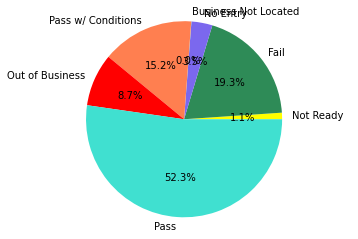

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = countResultsdf['Results']
sizes = countResultsdf['cnt']
colors = ['yellow', 'seagreen', 'mediumslateblue', 'palegreen', 'coral', 'red', 'turquoise']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')

In [29]:
from pyspark.sql.types import DoubleType

In [30]:
def labelForResults(s):
    if s == 'Fail':
        return 0.0
    elif s == 'Pass w/ Conditions' or s == 'Pass':
        return 1.0
    else:
        return -1.0
label = spark.udf.register("labelForResults",labelForResults, DoubleType())
labeledData = FoodInspections.select(label(FoodInspections.Results).alias('label'), FoodInspections.Violations).where('label >= 0')

In [31]:
labeledData.show(5)

+-----+--------------------+
|label|          Violations|
+-----+--------------------+
|  0.0|5. PROCEDURES FOR...|
|  0.0|3. MANAGEMENT, FO...|
|  1.0|47. FOOD & NON-FO...|
|  1.0|55. PHYSICAL FACI...|
|  1.0|                null|
+-----+--------------------+
only showing top 5 rows



### **Cleaning null values**

In [32]:
labeledData = labeledData.na.drop()

In [33]:
TestDataset=labeledData.sample(0.2)

In [34]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer

In [35]:
tokenizer = Tokenizer(inputCol="Violations", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10, regParam=0.01)

In [36]:
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

In [37]:
model = pipeline.fit(labeledData)

In [38]:
predictionsDf = model.transform(TestDataset)
predictionsDf.registerTempTable('Predictions')
predictionsDf.columns

['label',
 'Violations',
 'words',
 'features',
 'rawPrediction',
 'probability',
 'prediction']

In [39]:
numSuccesses = predictionsDf.where("""(prediction = 0 AND label = 0) OR
                                        (prediction = 1 AND (label = 1))""").count()
numInspections = predictionsDf.count()

print("There were {} inspections and there were {} successful predictions".format(numInspections,numSuccesses))
print("This is a {}% success rate".format((float(numSuccesses) / float(numInspections)) * 100))

There were 31581 inspections and there were 30974 successful predictions
This is a 98.07795826604604% success rate


In [40]:
true_positive = spark.sql("SELECT count(*) AS cnt FROM Predictions WHERE prediction = 1 AND label = 1").toPandas()
false_positive = spark.sql("SELECT count(*) AS cnt FROM Predictions WHERE prediction = 1 AND label = 0").toPandas()
true_negative = spark.sql("SELECT count(*) AS cnt FROM Predictions WHERE prediction = 0 AND label = 0").toPandas()
false_negative = spark.sql("SELECT count(*) AS cnt FROM Predictions WHERE prediction = 0 AND label = 1").toPandas()

(-1.1202723287351057,
 1.1009653828180233,
 -1.1010280364650922,
 1.1202878963166467)

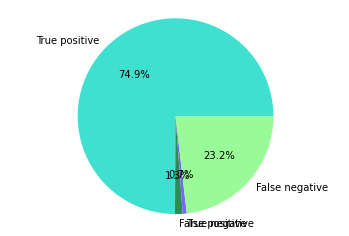

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = ['True positive', 'False positive', 'True negative', 'False negative']
sizes = [true_positive['cnt'][0], false_positive['cnt'][0], false_negative['cnt'][0], true_negative['cnt'][0]]
colors = ['turquoise', 'seagreen', 'mediumslateblue', 'palegreen', 'coral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')